## Data Analysis pipeline for all datasets

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [33]:
df = pd.read_excel(r"C:\github\news\news\german-news\clean_data\xlsx\ntv.xlsx")
df["author_organization"] = np.nan
df.rename(columns={
    "News Outlet": "news_outlet",
    "Provenance": "provenance",
    "Query Keywords": "query_keywords",
    "Creation Date": "creation_date",
    "Crawl Date": "crawl_date",
    "Author Person": "author_person",
    "News Keywords": "news_keywords",
    "Title": "content_title",
    "Description": "content_description",
    "Body": "content_body",
    "Fake News": "Fake News",
    "Extreme bias": "Extreme bias",
    "clickbait": "clickbait",
    "credible": "credible"
}, inplace=True)
df

,news_outlet,provenance,query_keywords,creation_date,crawl_date,author_person,news_keywords,content_title,content_description,content_body,Fake News,Extreme bias,clickbait,credible,author_organization
0,ntv,https://www.n-tv.de/wissen/Groesster-Vollmond-...,"ns, us, europa, rna, amerika, schi, usa, ss, l...",30.09.2024,20.10.2024,NaN,"Bildung, Sternschnuppen, Astronomie, Astrologi...",Größter Vollmond des Jahres und superschnelle ...,Der neue Monat wartet mit dem größten Vollmond...,Vollmond wird im Oktober am 17. um 13.26 Uhr ...,0.0,0.0,0.0,1.0,NaN
1,ntv,https://www.n-tv.de/wissen/Komet-Tsuchinshan-A...,"ns, sp, ss, us",09.10.2024,20.10.2024,NaN,"Bildung, Kometen, Weltraum",Nachtschwärmer sehen bald Kometen mit bloßem Auge,Der Komet Tsuchinshan-Atlas nähert sich der Er...,Schaulustige können voraussichtlich in Kürze ...,0.0,0.0,0.0,1.0,NaN
2,ntv,https://www.n-tv.de/wissen/Kleine-Saturn-Monde...,"ns, us, rna, usa, schi, ss, sp",28.03.2019,20.10.2024,NaN,"Bildung, Saturn, Nasa, Astronomie, Raumsonden,...",Kleine Saturn-Monde sind leicht wie Kork,"Die Raumsonde ""Cassini"" fliegt bei ihrer Missi...","Die Raumsonde ""Cassini"" hat zum Ende ihrer Mi...",0.0,0.0,0.0,1.0,NaN
3,ntv,https://www.n-tv.de/sport/fussball-em/Die-grau...,"ns, us, rna, politik, frankreich, schi, usa, s...",01.08.2022,21.10.2024,Eine Danksagung von David Bedürftig,"DFB-Frauen, England, Europameisterschaften, Jo...",Die grausam-schönste aller Achterbahnfahrten,Endlich wieder Puls. Und das bei einem Länders...,"Huch, was ist da denn los? Puls bis zum Ansch...",0.0,0.0,0.0,1.0,NaN
4,ntv,https://www.n-tv.de/sport/fussball-em/Nachruec...,"ns, us, rna, schi, ss, sp",09.07.2022,21.10.2024,NaN,"Europameisterschaften, Frauenfußball",Nachrücker Portugal verpasst Sensations-Comeback,Die Zuschauer beim Spiel zwischen der Schweiz ...,Die Fußballerinnen der Schweiz haben trotz ei...,0.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,ntv,https://www.n-tv.de/sport/fussball/Der-grotesk...,"ns, us, sp, rna, schi, ss, leiche, israel, spo",17.07.2022,21.10.2024,NaN,"Fußball, Robert Lewandowski, FC Bayern München",Der groteske Abgang des Welt-Wutfußballers,Nach einem wochenlangen Theater mit ständig ne...,Robert Lewandowski war an diesem Samstag der ...,NaN,NaN,NaN,NaN,NaN
1012,ntv,https://www.n-tv.de/sport/fussball/Kahn-moderi...,"ns, us, usa, schi, ss, sp",17.07.2022,21.10.2024,NaN,"Fußball, FC Bayern München, Fußball, Fußball-B...",Kahn moderiert wilde Superstar-Gerüchte (fast) ab,Die Gerüchte um Cristiano Ronaldo und einen We...,"Die ganz großen Emotionen blieben aus, Abschi...",NaN,NaN,NaN,NaN,NaN
1013,ntv,https://www.n-tv.de/wissen/Corona-Impfung-muss...,"ns, impfstoff, us, afrika, ss, sp, corona",02.08.2021,21.10.2024,NaN,"Bildung, Corona-Impfung, China, Schweden",Corona-Impfung muss nicht für immer piksen,Alle gerade zugelassenen Corona-Impfstoffe wer...,Bisher muss man für eine Corona-Impfung eine ...,NaN,NaN,NaN,NaN,NaN
1014,ntv,https://www.n-tv.de/sport/fussball/Ist-der-BVB...,"ns, us, europa, sp, schi, ss, spo",18.08.2022,21.10.2024,NaN,"Fußball, Cristiano Ronaldo, Manchester United,...",Ist der BVB Cristiano Ronaldos letzte Option?,Cristiano Ronaldo ist bei Manchester United un...,Cristiano Ronaldo ist der vielleicht größte F...,NaN,NaN,NaN,NaN,NaN


We will first have to get a look at our data and understand it

In [34]:
labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
df[labels].sum()

Fake News        0.0
Extreme bias     0.0
clickbait        1.0
credible        31.0
dtype: float64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   news_outlet          1016 non-null   object 
 1   provenance           1016 non-null   object 
 2   query_keywords       1016 non-null   object 
 3   creation_date        1016 non-null   object 
 4   crawl_date           1016 non-null   object 
 5   author_person        214 non-null    object 
 6   news_keywords        1016 non-null   object 
 7   content_title        1016 non-null   object 
 8   content_description  1016 non-null   object 
 9   content_body         1016 non-null   object 
 10  Fake News            31 non-null     float64
 11  Extreme bias         31 non-null     float64
 12  clickbait            31 non-null     float64
 13  credible             31 non-null     float64
 14  author_organization  0 non-null      float64
dtypes: float64(5), object(10)
memory usage

plot of label distr

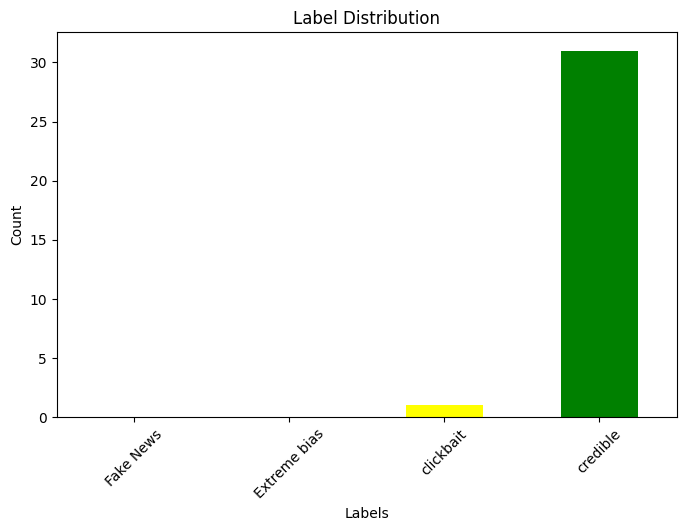

In [36]:
def plot_label_distribution(df, labels):
    label_counts = df[labels].sum()
    label_counts.plot(kind='bar', figsize=(8, 5), color=['red', 'orange', 'yellow', 'green'])
    plt.title('Label Distribution')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
plot_label_distribution(df, labels)

text length distribution

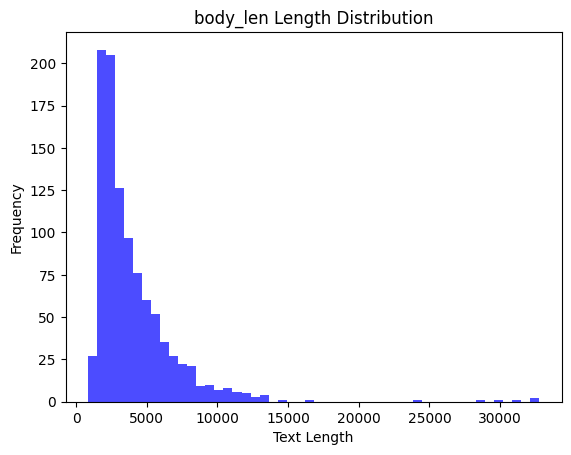

In [37]:
df['body_len'] = df['content_body'].str.len()

def plot_text_length_distribution(df, column):
    plt.hist(df[column], bins=50, color='blue', alpha=0.7)
    plt.title(f'{column} Length Distribution')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

plot_text_length_distribution(df, 'body_len')

len of article vs label

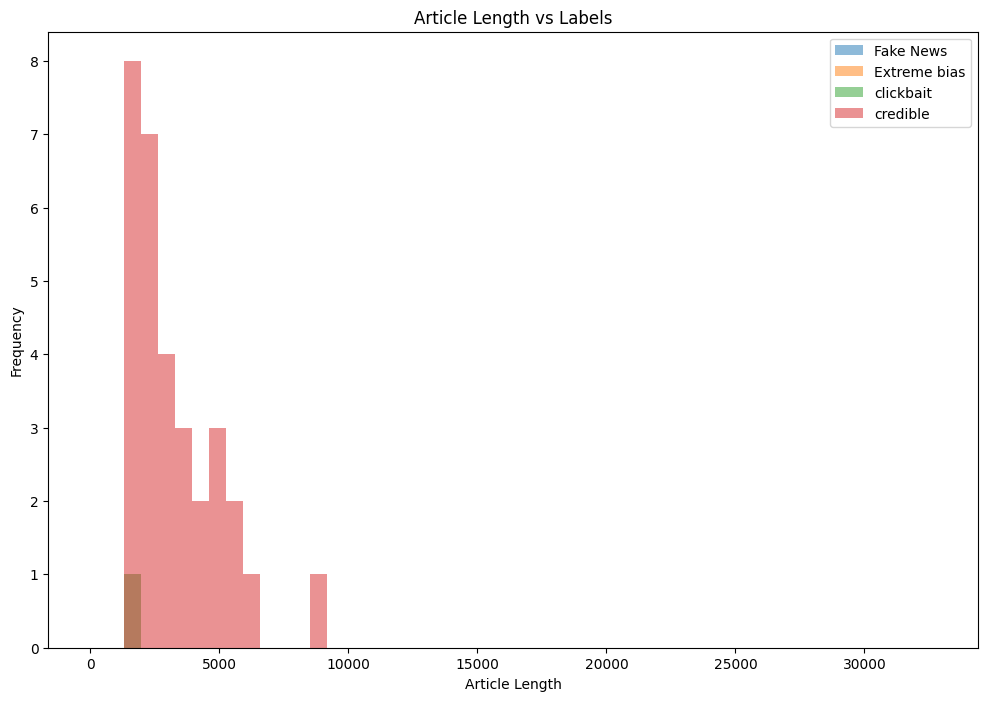

In [38]:
def plot_length_vs_label(df, labels, length_column):
    plt.figure(figsize=(12, 8))
    for label in labels:
        filtered = df[df[label] == 1]
        plt.hist(
            filtered[length_column], 
            bins=50, 
            alpha=0.5, 
            label=label,
            range=(0, df[length_column].max())
        )
    plt.title(f'Article Length vs Labels')
    plt.xlabel('Article Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_length_vs_label(df, labels, 'body_len')

visualize titles

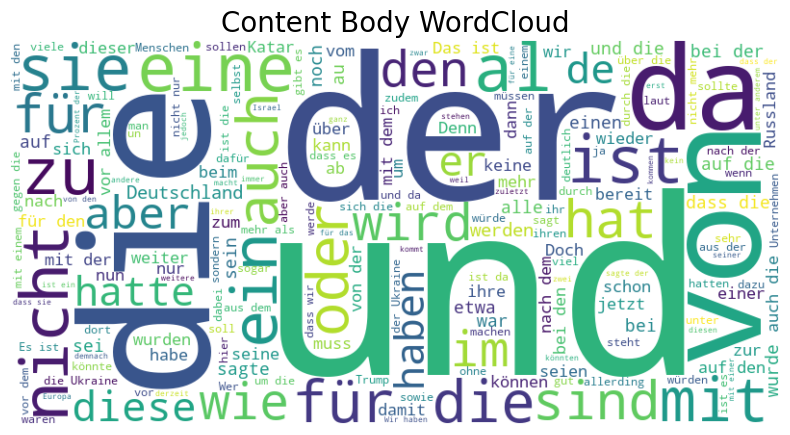

In [39]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

create_wordcloud(df['content_body'].dropna(), 'Content Body WordCloud')

visualize text

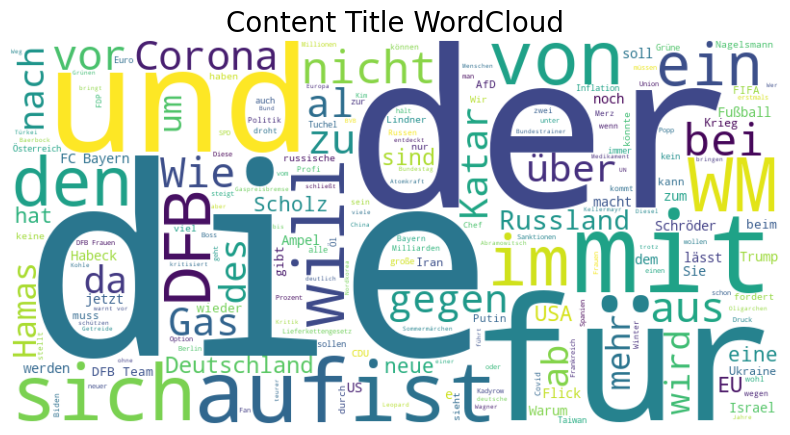

In [40]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

create_wordcloud(df['content_title'].dropna(), 'Content Title WordCloud')

split df to labelled and not labelled

In [41]:
df['has_label'] = df[labels].notna().any(axis=1)
labelled_df = df[df['has_label']]
unlabelled_df = df[~df['has_label']]

print(f"Labelled Data: {len(labelled_df)} rows")
print(f"Unlabelled Data: {len(unlabelled_df)} rows")

Labelled Data: 31 rows
Unlabelled Data: 985 rows


In [42]:
labelled_df.head()

,news_outlet,provenance,query_keywords,creation_date,crawl_date,author_person,news_keywords,content_title,content_description,content_body,Fake News,Extreme bias,clickbait,credible,author_organization,body_len,has_label
0,ntv,https://www.n-tv.de/wissen/Groesster-Vollmond-...,"ns, us, europa, rna, amerika, schi, usa, ss, l...",30.09.2024,20.10.2024,NaN,"Bildung, Sternschnuppen, Astronomie, Astrologi...",Größter Vollmond des Jahres und superschnelle ...,Der neue Monat wartet mit dem größten Vollmond...,Vollmond wird im Oktober am 17. um 13.26 Uhr ...,0.0,0.0,0.0,1.0,NaN,4546,True
1,ntv,https://www.n-tv.de/wissen/Komet-Tsuchinshan-A...,"ns, sp, ss, us",09.10.2024,20.10.2024,NaN,"Bildung, Kometen, Weltraum",Nachtschwärmer sehen bald Kometen mit bloßem Auge,Der Komet Tsuchinshan-Atlas nähert sich der Er...,Schaulustige können voraussichtlich in Kürze ...,0.0,0.0,0.0,1.0,NaN,2151,True
2,ntv,https://www.n-tv.de/wissen/Kleine-Saturn-Monde...,"ns, us, rna, usa, schi, ss, sp",28.03.2019,20.10.2024,NaN,"Bildung, Saturn, Nasa, Astronomie, Raumsonden,...",Kleine Saturn-Monde sind leicht wie Kork,"Die Raumsonde ""Cassini"" fliegt bei ihrer Missi...","Die Raumsonde ""Cassini"" hat zum Ende ihrer Mi...",0.0,0.0,0.0,1.0,NaN,2729,True
3,ntv,https://www.n-tv.de/sport/fussball-em/Die-grau...,"ns, us, rna, politik, frankreich, schi, usa, s...",01.08.2022,21.10.2024,Eine Danksagung von David Bedürftig,"DFB-Frauen, England, Europameisterschaften, Jo...",Die grausam-schönste aller Achterbahnfahrten,Endlich wieder Puls. Und das bei einem Länders...,"Huch, was ist da denn los? Puls bis zum Ansch...",0.0,0.0,0.0,1.0,NaN,5484,True
4,ntv,https://www.n-tv.de/sport/fussball-em/Nachruec...,"ns, us, rna, schi, ss, sp",09.07.2022,21.10.2024,NaN,"Europameisterschaften, Frauenfußball",Nachrücker Portugal verpasst Sensations-Comeback,Die Zuschauer beim Spiel zwischen der Schweiz ...,Die Fußballerinnen der Schweiz haben trotz ei...,0.0,0.0,0.0,1.0,NaN,2061,True


encode labels

In [43]:
def encode_labels(row, labels):
    return [int(row[label]) for label in labels]

labelled_df['label'] = labelled_df.apply(lambda row: encode_labels(row, labels), axis=1)

labelled_df = labelled_df.rename(
    columns={
        'content_title': 'title',
        'content_description': 'description',
        'content_body': 'body'
    }
)

C:\Users\hanna\AppData\Local\Temp\ipykernel_42028\55246372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_df['label'] = labelled_df.apply(lambda row: encode_labels(row, labels), axis=1)


In [44]:
labelled_df.head()

,news_outlet,provenance,query_keywords,creation_date,crawl_date,author_person,news_keywords,title,description,body,Fake News,Extreme bias,clickbait,credible,author_organization,body_len,has_label,label
0,ntv,https://www.n-tv.de/wissen/Groesster-Vollmond-...,"ns, us, europa, rna, amerika, schi, usa, ss, l...",30.09.2024,20.10.2024,NaN,"Bildung, Sternschnuppen, Astronomie, Astrologi...",Größter Vollmond des Jahres und superschnelle ...,Der neue Monat wartet mit dem größten Vollmond...,Vollmond wird im Oktober am 17. um 13.26 Uhr ...,0.0,0.0,0.0,1.0,NaN,4546,True,"[0, 0, 0, 1]"
1,ntv,https://www.n-tv.de/wissen/Komet-Tsuchinshan-A...,"ns, sp, ss, us",09.10.2024,20.10.2024,NaN,"Bildung, Kometen, Weltraum",Nachtschwärmer sehen bald Kometen mit bloßem Auge,Der Komet Tsuchinshan-Atlas nähert sich der Er...,Schaulustige können voraussichtlich in Kürze ...,0.0,0.0,0.0,1.0,NaN,2151,True,"[0, 0, 0, 1]"
2,ntv,https://www.n-tv.de/wissen/Kleine-Saturn-Monde...,"ns, us, rna, usa, schi, ss, sp",28.03.2019,20.10.2024,NaN,"Bildung, Saturn, Nasa, Astronomie, Raumsonden,...",Kleine Saturn-Monde sind leicht wie Kork,"Die Raumsonde ""Cassini"" fliegt bei ihrer Missi...","Die Raumsonde ""Cassini"" hat zum Ende ihrer Mi...",0.0,0.0,0.0,1.0,NaN,2729,True,"[0, 0, 0, 1]"
3,ntv,https://www.n-tv.de/sport/fussball-em/Die-grau...,"ns, us, rna, politik, frankreich, schi, usa, s...",01.08.2022,21.10.2024,Eine Danksagung von David Bedürftig,"DFB-Frauen, England, Europameisterschaften, Jo...",Die grausam-schönste aller Achterbahnfahrten,Endlich wieder Puls. Und das bei einem Länders...,"Huch, was ist da denn los? Puls bis zum Ansch...",0.0,0.0,0.0,1.0,NaN,5484,True,"[0, 0, 0, 1]"
4,ntv,https://www.n-tv.de/sport/fussball-em/Nachruec...,"ns, us, rna, schi, ss, sp",09.07.2022,21.10.2024,NaN,"Europameisterschaften, Frauenfußball",Nachrücker Portugal verpasst Sensations-Comeback,Die Zuschauer beim Spiel zwischen der Schweiz ...,Die Fußballerinnen der Schweiz haben trotz ei...,0.0,0.0,0.0,1.0,NaN,2061,True,"[0, 0, 0, 1]"


we can drop, whatever we dont need, later

export data

In [45]:
labelled_df.to_csv('ntv_labelled_data.csv', index=False)
unlabelled_df.to_csv('ntv_unlabelled_data.csv', index=False)